<a href="https://colab.research.google.com/github/kirubanath/ML_learnings/blob/main/ML_basics1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1 

## Importing all the needed libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.datasets import load_iris

## 1. Read the data into a numpy array

In [ ]:
# Read data from file: 'data.csv'. 
# Note that the first row has the number of inputs and number of outputs specified.
# For your reference: you can use "np.loadtxt".

url = 'https://raw.githubusercontent.com/kirubanath/Datasets/main/data.csv'
data_array = np.genfromtxt(url, delimiter=',',skip_header=1)
data_array

array([[  51.87,   79.72, 1249.99],
       [ -30.66,  -15.64, -516.61],
       [ -57.57,   94.22,  312.09],
       ...,
       [ -18.6 ,   32.61,  -45.14],
       [ -38.31,   77.81,  -20.13],
       [ -38.33,   45.69, -460.47]])

## 2. Plot and explore the data to get a better understanding

In [ ]:
#checking the shape of the data:
data_array.shape

(3000, 3)

In [ ]:
#checking the correlation between the columns: (input vs output and input1 vs input 2)
np.corrcoef(data_array.T)

array([[1.        , 0.49902775, 0.89002879],
       [0.49902775, 1.        , 0.78639191],
       [0.89002879, 0.78639191, 1.        ]])

As we can see above both the input columns are highly correlated with the output column. At the same time they are not correlated with each other. So both of them are needed for predicting the output

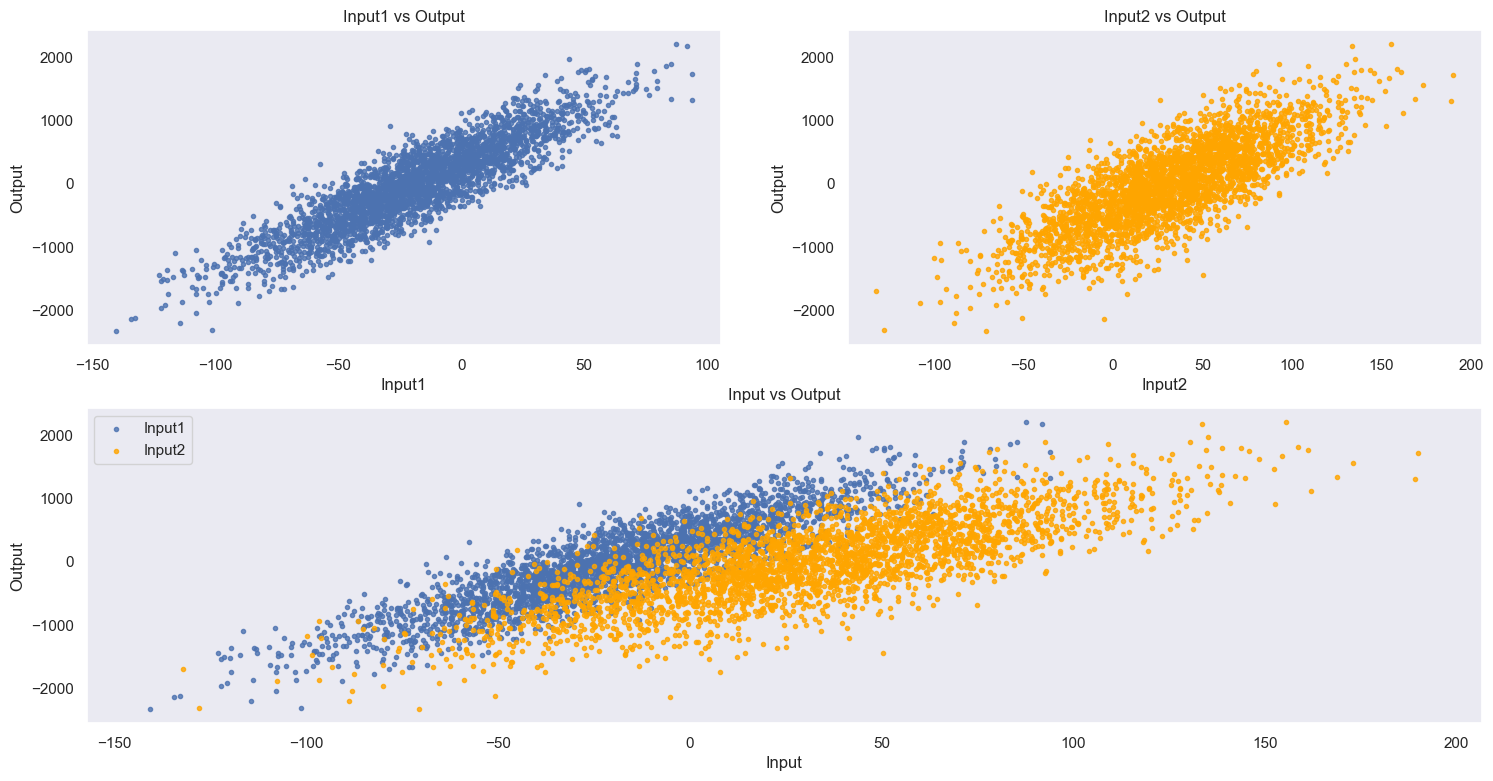

In [ ]:
#EDA: 
# Step1: vizulaizing the relationship between input and output:
fig = plt.figure(figsize=(18,9))
gd  = gridspec.GridSpec(2,2)  #creating grids for our plot

#input1 vs output:
ax = fig.add_subplot(gd[0,0]) #adding a subplot to the first grid
ax.scatter(data_array[:,0],data_array[:,2],marker='.',alpha= 0.8)
ax.title.set_text('Input1 vs Output')
ax.set_xlabel('Input1')
ax.set_ylabel('Output')
ax.grid()

#input2 vs output:
ax = fig.add_subplot(gd[0,1]) #adding a subplot to the second grid
ax.scatter(data_array[:,1],data_array[:,2],marker='.',alpha= 0.8, c = 'orange')
ax.title.set_text('Input2 vs Output')
ax.set_xlabel('Input2')
ax.set_ylabel('Output')
ax.grid()

#input1 vs output:
ax = fig.add_subplot(gd[1,:]) #adding a subplot to the third and fourth grid
ax.scatter(data_array[:,0],data_array[:,2],marker='.',alpha= 0.8)
ax.scatter(data_array[:,1],data_array[:,2],marker='.',alpha= 0.8, c = 'orange')
ax.title.set_text('Input vs Output')
ax.set_xlabel('Input')
ax.set_ylabel('Output')
ax.legend(['Input1','Input2'])
ax.grid()



As we can see, the plots support the discoveries from above.

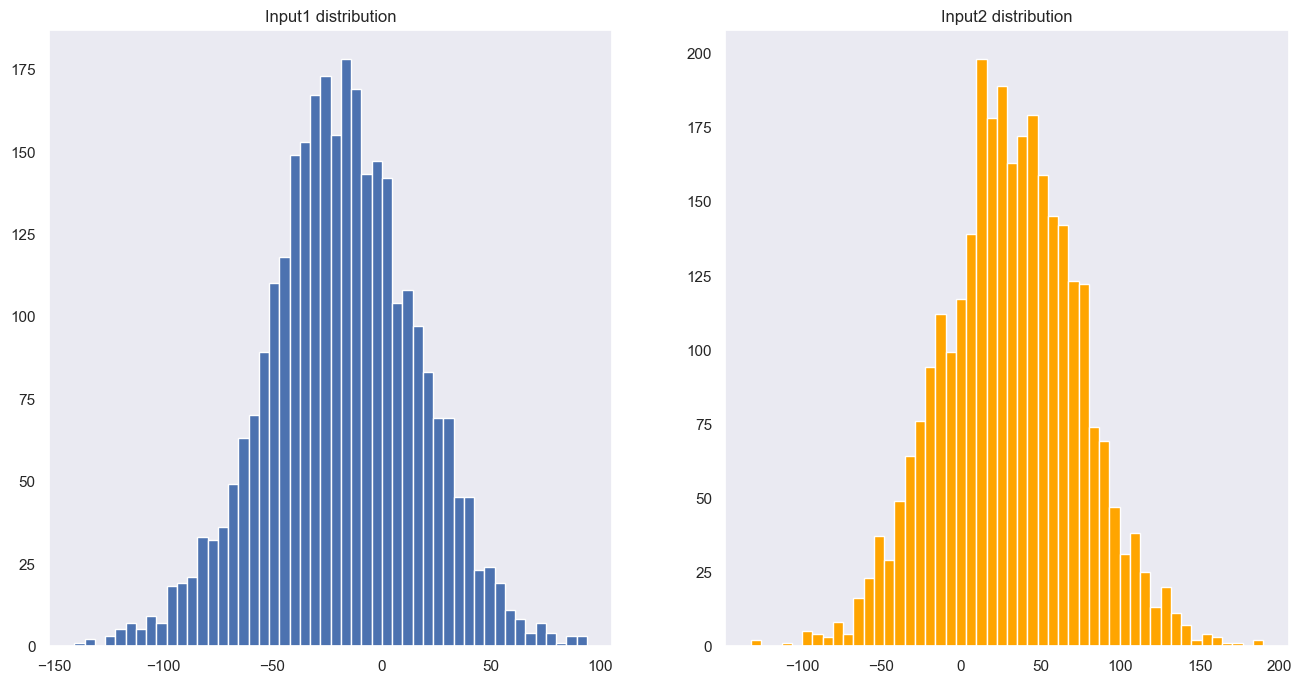

In [ ]:
#step2: checking the distribution of the input :- have to be normal distribution
fig, ax = plt.subplots(1,2,figsize = (16,8))

#input1:
ax[0].hist(data_array[:,0],bins =50, edgecolor = 'white')
ax[0].title.set_text('Input1 distribution')
ax[0].grid()

#input2:
ax[1].hist(data_array[:,1],bins =50, edgecolor = 'white', color = 'orange')
ax[1].title.set_text('Input2 distribution')
ax[1].grid()

## 3. Prepare the data for modelling

In [ ]:
# Separate the data: input and output.
#as given the first two columns are input and the third column is output
input  = data_array[:,:2]
output = data_array[:,2]

In [ ]:
# Perform a train-val-test split of 60-20-20.
# Use "random_state=42".
# For your reference: you can use "train_test_split" from sklearn twice to perform this. 
X_train, x, Y_train, y        = train_test_split(input, output, train_size=0.6, random_state=42)
X_valid,X_test,Y_valid,Y_test = train_test_split(x    ,      y, train_size=0.5, random_state=42)

 * From your understanding of the dataset, is stratified sampling necessary in this case? Why / Why not?


Stratified sampling is used when there are classes in the dataset and we want to represent each of them appropriately when training. But in this particular case there are no classes to begin with. So startified sampling is not necessary.

## 4. Modelling

Here we are going to try different models of regression and different hyperparameters and figure out the best fit for the data using cross validation.

Cross Validation Referrence  : https://www.youtube.com/watch?v=HdlDYng8g9s

Cross Validation 5 fold:

Here we do 5 fold, meaning the data is devided into 5 parts: 4 train and 1 test and then based on different permutations of the parameters given we get 5 different scores for each permutation. Then based on the average of these 5 scores we choose the best combination of the hyperparameter.

We can even apply the same with different models as well, with each model having different possibilities of hyperparameters. This way we can select the best model with best combination of hyperparameter for our given problem.

In [ ]:
#combine train and valid data :  for fitting the regression model
X = np.concatenate((X_train,X_valid),axis = 0)
Y = np.concatenate((Y_train,Y_valid),axis = 0) 

### 4.1 Linear Regression

In [ ]:
#initializing the linear regression model:
lr = LinearRegression()

#fitting the data:
lr.fit(X,Y)

#predicting based on the model
Y_pred_lr_train = lr.predict(X)      #predicting based on the training data itself
Y_pred_lr_test  = lr.predict(X_test) #predicting based on test data

#Goodness of fit
print("R_squared vaue is:",lr.score(X_test,Y_test))

#model parameters:
print('Coefficients are:',lr.coef_)
print('Intercept is:',lr.intercept_)

R_squared vaue is: 0.9502316143025633
Coefficients are: [12.71176694  7.08551949]
Intercept is: 4.320651371788633


### 4.2 Ridge Regression

In [ ]:
#initilaizng the hyperparameters:  in this case ust alpha
param_rg = {'alpha' : [i for i in range(1,1001)]}  #alpha values from 1 to 1000

#cross validation to get the best alpha
clf_ridge = GridSearchCV(Ridge(),param_rg, cv = 5, return_train_score=False)  #here cv=5 is by default (5 fold validation)  

#now search using given data
clf_ridge.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                   14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                   25, 26, 27, 28, 29, 30, ...]})

In [ ]:
#the results of the grid search are store in .cv_reults_:
df = pd.DataFrame(clf_ridge.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004795,0.007385,0.000619,0.000509,1,{'alpha': 1},0.938697,0.949458,0.947543,0.948449,0.946167,0.946063,0.003839,1000
1,0.000601,0.000491,0.000000,0.000000,2,{'alpha': 2},0.938697,0.949458,0.947543,0.948449,0.946167,0.946063,0.003839,999
2,0.000401,0.000491,0.000204,0.000408,3,{'alpha': 3},0.938697,0.949458,0.947543,0.948449,0.946167,0.946063,0.003839,998
3,0.000799,0.000400,0.000000,0.000000,4,{'alpha': 4},0.938697,0.949458,0.947543,0.948449,0.946167,0.946063,0.003839,997
4,0.000802,0.000402,0.000201,0.000401,5,{'alpha': 5},0.938697,0.949458,0.947543,0.948449,0.946167,0.946063,0.003839,996


To get the best score we can either take the rank_test_score ==1 or there is a inbuilt .best_score_ for the mean_test_score

In [ ]:
#df[df['mean_test_score'] == clf_ridge.best_score_]
df[df['rank_test_score'] == 1]['params']

627    {'alpha': 628}
Name: params, dtype: object

In [ ]:
#so alpha = 628 is the best value for our hyperparameter:  train with alpha = 628
ridge = Ridge(alpha = 628)

#fit the data:
ridge.fit(X,Y)

#predicting based on the model:
Y_pred_ridge_train = ridge.predict(X) 
Y_pred_ridge_test  = ridge.predict(X_test)

#Goodness of fit
print("R_squared vaue is:",ridge.score(X_test,Y_test))

#model parameters:
print("Coefficeints are:", ridge.coef_)
print("Intercept is:", ridge.intercept_)
print("Penalty(alpha) is:",ridge.alpha)

R_squared vaue is: 0.9502297907201629
Coefficeints are: [12.70887497  7.08564663]
Intercept is: 4.264704397282133
Penalty(alpha) is: 628


### 4.3 Lasso Regression

In [ ]:
#same steps as above
param_ls = {'alpha':[i/10 for i in range(1,101)]}
clf_lasso = GridSearchCV(Lasso(), param_ls , cv =5 , return_train_score= False)
clf_lasso.fit(X,Y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8,
                                   1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
                                   2.8, 2.9, 3.0, ...]})

In [ ]:
df = pd.DataFrame(clf_lasso.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008325,0.013037,0.000602,0.000804,0.1,{'alpha': 0.1},0.940317,0.947068,0.950277,0.950353,0.947567,0.947117,0.003658,53
1,0.000600,0.000490,0.000907,0.000493,0.2,{'alpha': 0.2},0.940317,0.947068,0.950277,0.950353,0.947567,0.947117,0.003658,21
2,0.000000,0.000000,0.000799,0.000400,0.3,{'alpha': 0.3},0.940317,0.947068,0.950277,0.950353,0.947567,0.947117,0.003658,19
3,0.000219,0.000437,0.000200,0.000400,0.4,{'alpha': 0.4},0.940318,0.947068,0.950277,0.950353,0.947567,0.947117,0.003658,17
4,0.001155,0.000329,0.000000,0.000000,0.5,{'alpha': 0.5},0.940318,0.947068,0.950277,0.950353,0.947567,0.947117,0.003658,15


In [ ]:
df[df['rank_test_score']==1]['params']

11    {'alpha': 1.2}
Name: params, dtype: object

In [ ]:
lasso = Lasso(alpha = 1.2)
lasso.fit(X,Y)

Y_pred_lasso_train = lasso.predict(X)
Y_pred_lasso_test   = lasso.predict(X_test)

#Goodness of fit
print("R_squared vaue is:",lasso.score(X_test,Y_test))

#model parameters:
print("Coefficients are:", lasso.coef_)
print("Intercept is:", lasso.intercept_)
print("Penalty(alpha) is:", lasso.alpha)


R_squared vaue is: 0.9502318796403139
Coefficients are: [12.71116551  7.08509901]
Intercept is: 4.323173615009304
Penalty(alpha) is: 1.2


### 4.4 ElasticNet Regression

In [ ]:
#combination of lasso and ridge
param_el = {"alpha":[i/10 for i in range(1,101)], "l1_ratio":[i/100 for i in range(1,100)]}

clf_elas = GridSearchCV(ElasticNet(),param_el,cv=5, return_train_score = False)
clf_elas.fit(X,Y)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8,
                                   1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
                                   2.8, 2.9, 3.0, ...],
                         'l1_ratio': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07,
                                      0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14,
                                      0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21,
                                      0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28,
                                      0.29, 0.3, ...]})

In [ ]:
df = pd.DataFrame(clf_elas.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000821,0.000412,0.000000,0.000000,0.1,0.01,"{'alpha': 0.1, 'l1_ratio': 0.01}",0.940319,0.947067,0.950276,0.950353,0.947567,0.947117,0.003657,649
1,0.000600,0.000490,0.000402,0.000492,0.1,0.02,"{'alpha': 0.1, 'l1_ratio': 0.02}",0.940319,0.947067,0.950276,0.950353,0.947567,0.947117,0.003657,647
2,0.001197,0.000975,0.000400,0.000489,0.1,0.03,"{'alpha': 0.1, 'l1_ratio': 0.03}",0.940319,0.947067,0.950276,0.950353,0.947567,0.947117,0.003657,646
3,0.000334,0.000422,0.000199,0.000398,0.1,0.04,"{'alpha': 0.1, 'l1_ratio': 0.04}",0.940319,0.947067,0.950276,0.950353,0.947567,0.947117,0.003657,644
4,0.000605,0.000804,0.000257,0.000514,0.1,0.05,"{'alpha': 0.1, 'l1_ratio': 0.05}",0.940319,0.947068,0.950276,0.950353,0.947567,0.947117,0.003657,679


In [ ]:
df[df["rank_test_score"] ==1]['params']

137    {'alpha': 0.2, 'l1_ratio': 0.39}
Name: params, dtype: object

In [ ]:
elastic = ElasticNet(alpha = 0.2, l1_ratio = 0.39)
elastic.fit(X,Y)

Y_pred_elas_train = elastic.predict(X)
Y_pred_elas_test  = elastic.predict(X_test)

#Goodness of fit
print("R_squared vaue is:",elastic.score(X_test,Y_test))

#model parameters:
print("Coefficients:",elastic.coef_)
print("Intercept:",elastic.intercept_)
print("penalty(alpha):",elastic.alpha)
print("l1_ratio:",elastic.l1_ratio)

R_squared vaue is: 0.9502308275313834
Coefficients: [12.71041587  7.08553704]
Intercept: 4.295839682828575
penalty(alpha): 0.2
l1_ratio: 0.39


## 5. Analysis

In [ ]:
# Write down the actual value along with the preditions from all the regression models, for the first 10 points in test data.
df = pd.DataFrame()
df['Actual'] = Y_test[0:10]
df['Linear'] = Y_pred_lr_test[0:10]
df['Ridge']  = Y_pred_ridge_test[0:10]
df['Lasso']  = Y_pred_lasso_test[0:10]
df['Elastic']= Y_pred_elas_test[0:10]
df.index = [i for i in range(1,11)]
print(df)


    Actual       Linear        Ridge        Lasso      Elastic
1   280.16   232.929309   232.868135   232.918722   232.900930
2  -193.86  -117.439635  -117.350126  -117.437124  -117.399326
3   619.91   583.259754   583.201278   583.228553   583.230653
4  -305.45  -393.335976  -393.163368  -393.321408  -393.257334
5   -31.10    85.216456    85.228574    85.210913    85.221363
6   280.18   145.938591   145.920286   145.930989   145.929684
7  -700.85  -592.569438  -592.487642  -592.538770  -592.529946
8   747.05   576.334435   576.234213   576.305685   576.286873
9  -777.72  -709.495395  -709.364373  -709.460305  -709.433450
10  836.78  1025.852134  1025.679106  1025.800672  1025.769850


In [ ]:
# Find both RMSE and MAE for all the regression models on both training(train+val) and testing data.
df = pd.DataFrame()
df.index = ['Linear','Ridge','Lasso','ElasticNet']

df['RMSE_train'] = np.sqrt(np.array([mean_squared_error(Y,Y_pred_lr_train),mean_squared_error(Y,Y_pred_ridge_train),mean_squared_error(Y,Y_pred_lasso_train),mean_squared_error(Y,Y_pred_elas_train)]))
df['RMSE_test'] = np.sqrt(np.array([mean_squared_error(Y_test,Y_pred_lr_test),mean_squared_error(Y_test,Y_pred_ridge_test),mean_squared_error(Y_test,Y_pred_lasso_test),mean_squared_error(Y_test,Y_pred_elas_test)]))

df['MAE_train'] = np.sqrt(np.array([mean_absolute_error(Y,Y_pred_lr_train),mean_absolute_error(Y,Y_pred_ridge_train),mean_absolute_error(Y,Y_pred_lasso_train),mean_absolute_error(Y,Y_pred_elas_train)]))
df['MAE_test'] = np.sqrt(np.array([mean_absolute_error(Y_test,Y_pred_lr_test),mean_absolute_error(Y_test,Y_pred_ridge_test),mean_absolute_error(Y_test,Y_pred_lasso_test),mean_absolute_error(Y_test,Y_pred_elas_test)]))

print(df)

            RMSE_train   RMSE_test  MAE_train   MAE_test
Linear      151.215119  150.075808  10.952214  11.048950
Ridge       151.215150  150.078557  10.952252  11.049231
Lasso       151.215123  150.075408  10.952219  11.048991
ElasticNet  151.215126  150.076994  10.952232  11.049077


## 6. Final Observations
Write down your final conclusions and observations

From the above, we can see that all the models give almost same error and accuracy and hence we can use any of these models on our dataset. It is interesting how RMSE is better for test compared to train!

# Question 2 (30 points)

Given the automobile dataset at https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv , 

## 1. Load and examine the dataset

In [ ]:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
data_df = pd.read_csv(url)

In [ ]:
data_df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [ ]:
data_df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


Here I am taking mileage as the variable to predict: city-L/100km

In [ ]:
#step1: check the correlation between other columns and the output column: (only possible for numerical variables)
corr_mat = data_df.corr(numeric_only= True)
corr_mat[(corr_mat['city-L/100km'] > 0.7)|(corr_mat['city-L/100km'] < -0.7)]['city-L/100km'].sort_values()

city-mpg       -0.949713
highway-mpg    -0.930028
engine-size     0.745059
curb-weight     0.785353
price           0.789898
horsepower      0.889488
city-L/100km    1.000000
Name: city-L/100km, dtype: float64

Above are all the numerical variables that are effecting the mileage (either positively or negatively)

The problem here is all of these variables maybe highly correlated among themselves! so taking all of them doesn't make sense!

Also city and highway mpg are literal opposites of mileage, so we are removing that.

In [ ]:
test_df = data_df[['curb-weight','engine-size','horsepower','price']]
test_df.corr()

,curb-weight,engine-size,horsepower,price
curb-weight,1.000000,0.849072,0.757976,0.834415
engine-size,0.849072,1.000000,0.822676,0.872335
horsepower,0.757976,0.822676,1.000000,0.809575
price,0.834415,0.872335,0.809575,1.000000


Based on the above observation we can see that the variable that are least correlated among themselves and therefore most useful are:

1. horsepower (highest correlated with mileage)
2. curbweight (third highest but less correlated with horsepower compared to the second)
---

Now let us check the usefulness of the categorical variables:

we are not using horsepower binned since it is same as the numerical variable horsepower

idea: in the box plots of mileage vs each of the classes of these categorical variables if there is a significant difference (no overlaps along y-axis) then we consider that vvariable.

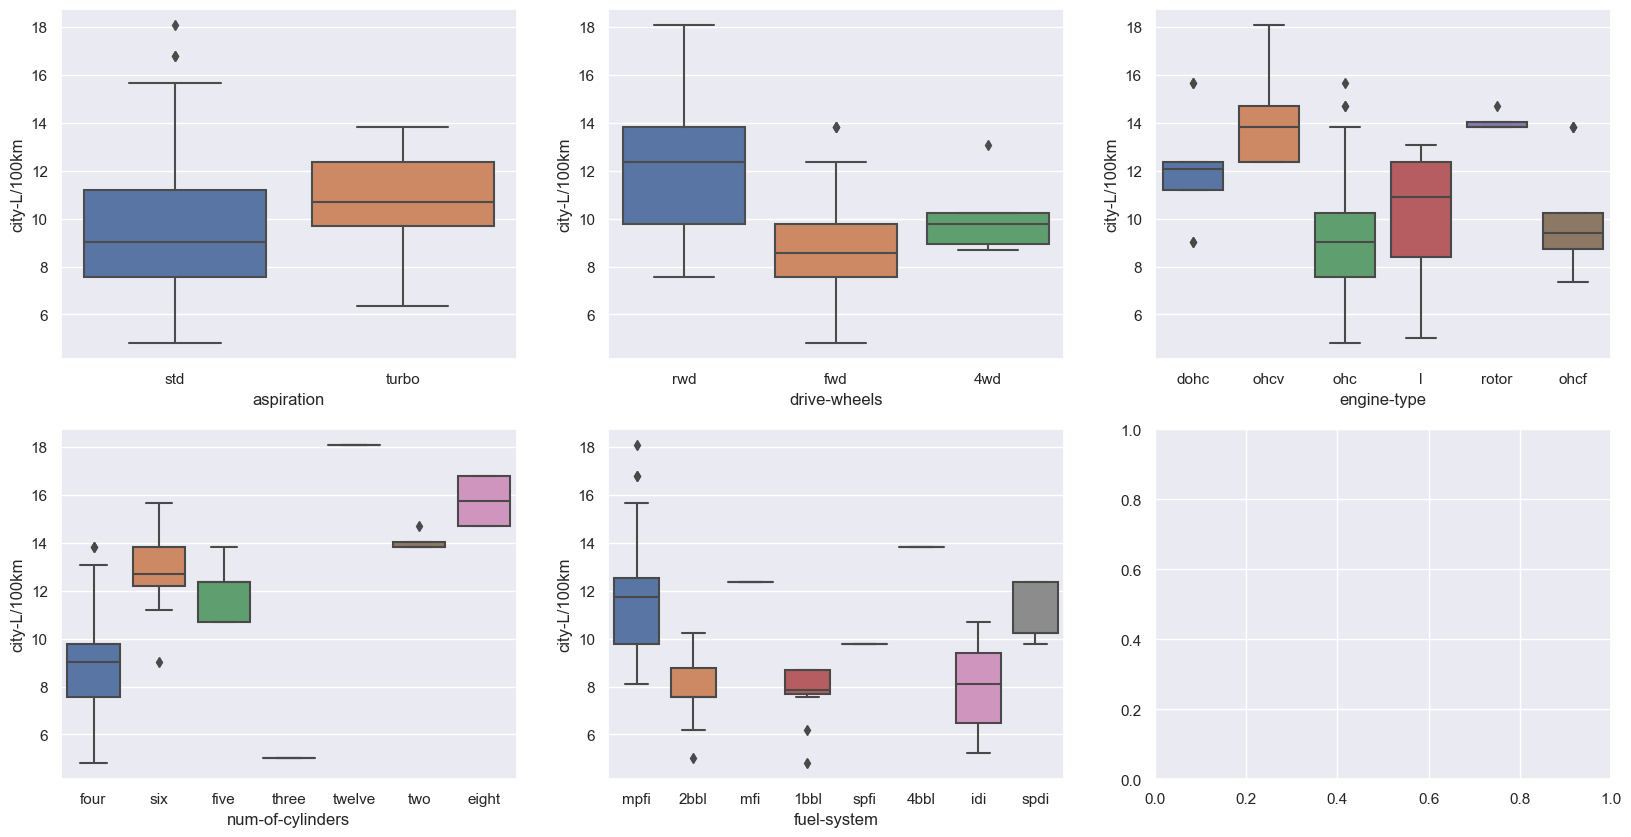

In [ ]:

f, ax = plt.subplots(2, 3, figsize = (20,10))

sns.boxplot(x=data_df['aspiration'], y=data_df['city-L/100km'], ax=ax[0,0])
sns.boxplot(x=data_df['drive-wheels'], y=data_df['city-L/100km'], ax=ax[0,1])
sns.boxplot(x=data_df['engine-type'], y=data_df['city-L/100km'], ax=ax[0,2])
sns.boxplot(x=data_df['num-of-cylinders'], y=data_df['city-L/100km'], ax=ax[1,0])
sns.boxplot(x=data_df['fuel-system'], y=data_df['city-L/100km'], ax=ax[1,1]);


From above we can see that 'aspiration' is not impacting mileage at all. So ignoring that we will take all the remaining variables

Finally the features we selected are:
1. horsepower
2. curb-weight
3. num-of-cylinders
4. fuel-system
5. drive-wheels
6. engine-type

In [ ]:
mileage_df = data_df[['curb-weight','horsepower','drive-wheels','engine-type','num-of-cylinders', 'fuel-system']]
mileage_df.head()

,curb-weight,horsepower,drive-wheels,engine-type,num-of-cylinders,fuel-system
0,2548,111.0,rwd,dohc,four,mpfi
1,2548,111.0,rwd,dohc,four,mpfi
2,2823,154.0,rwd,ohcv,six,mpfi
3,2337,102.0,fwd,ohc,four,mpfi
4,2824,115.0,4wd,ohc,five,mpfi


In [ ]:
#let us do one-hot encoding for the categorical variables:
Input = pd.get_dummies(mileage_df,columns=['drive-wheels','engine-type','num-of-cylinders','fuel-system'])
Input.head()

,curb-weight,horsepower,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,2548,111.0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2548,111.0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2823,154.0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,2337,102.0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2824,115.0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## 2. Visualise/Plot the regression model

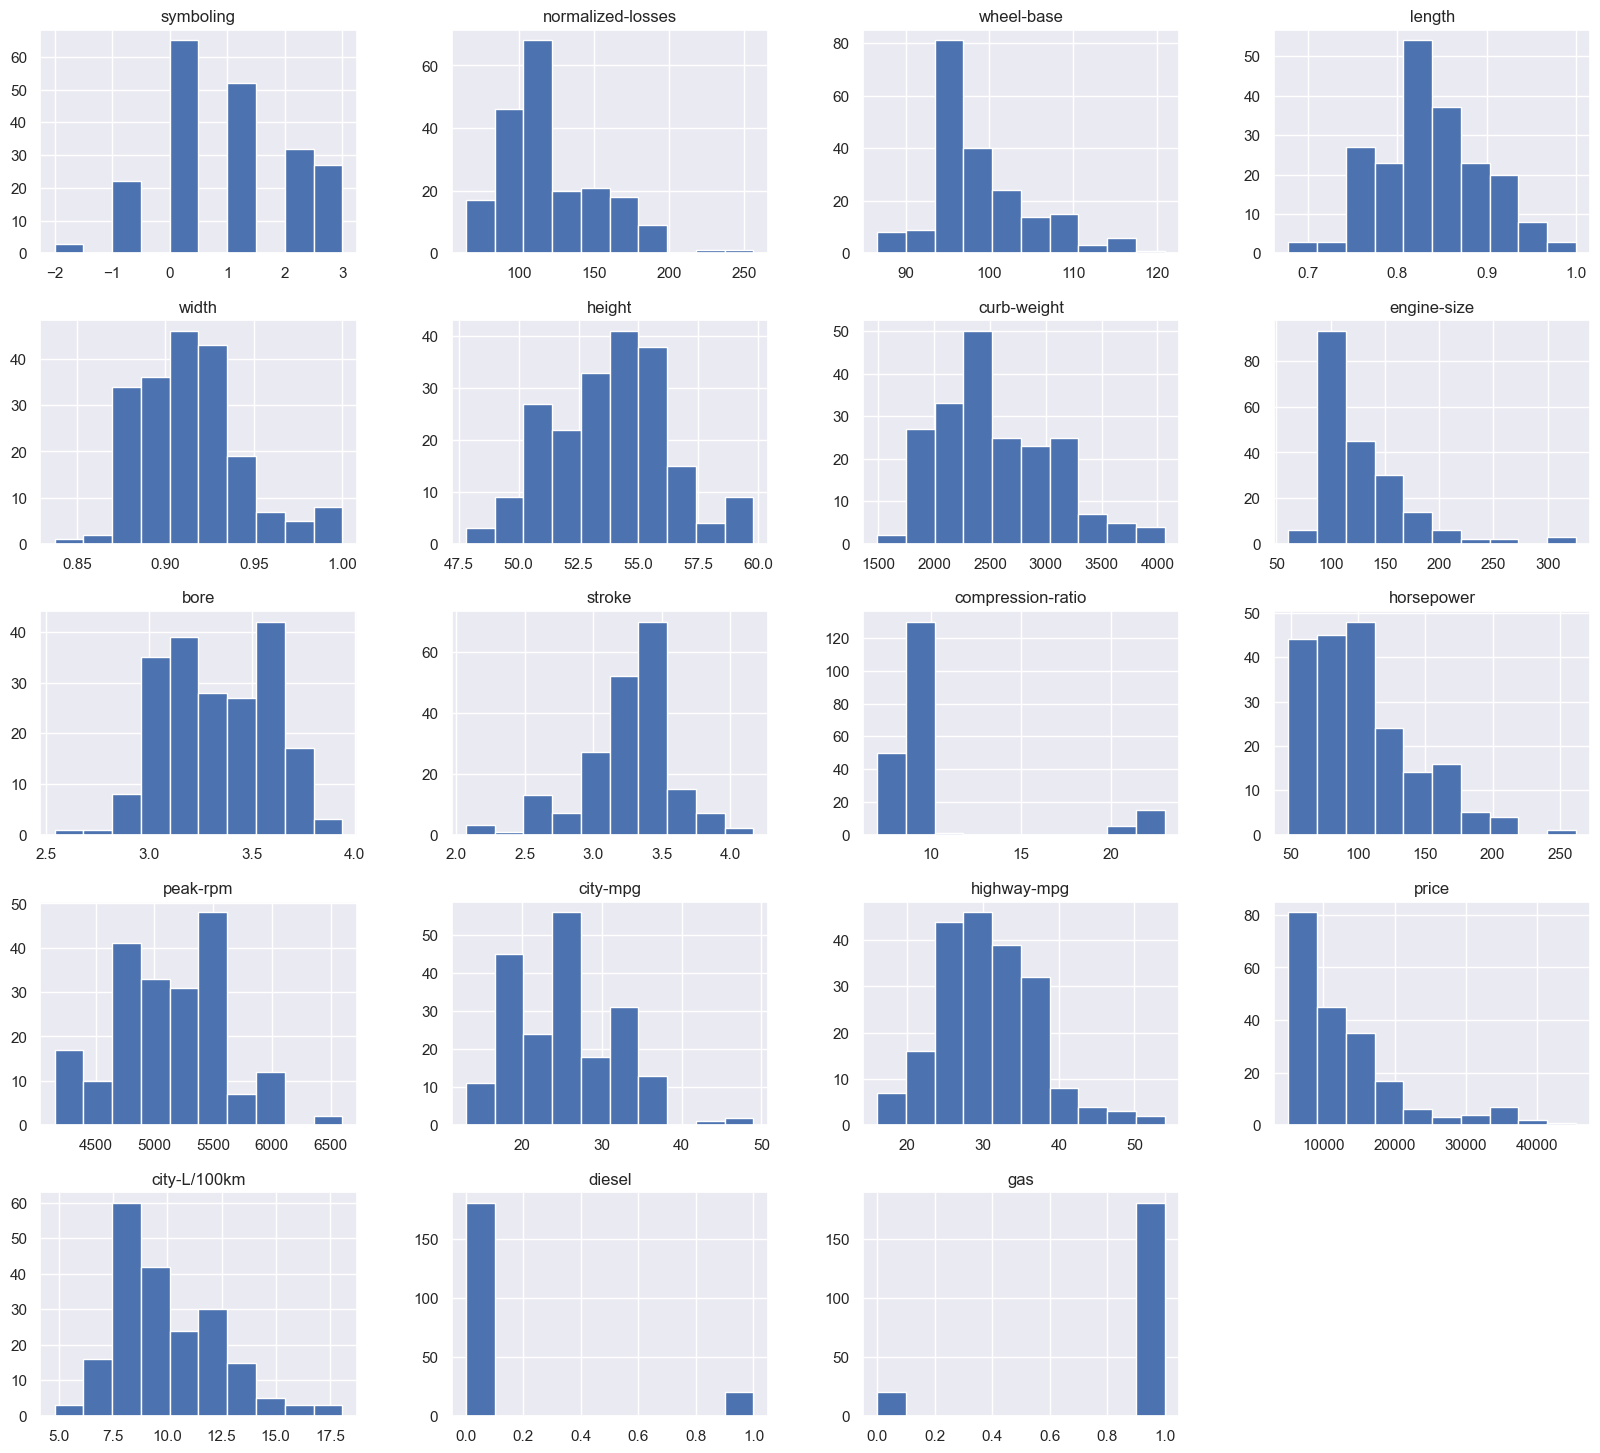

In [ ]:
data_df.hist(figsize = (20,18));

## 3. Generate a Linear Regression equation

In [ ]:
lr2 = LinearRegression()
lr2.fit(Input,data_df['city-L/100km'])

LinearRegression()

In [ ]:
pred = lr2.predict(Input)

## 4. Use a residual plot to inspect if LR fits the model

Residual plots are a way to evaluate the fit of the regression model (similar to R2 score)

Evaluation: 
1. The majority of the points must lie close the 0 line
2. The plot must be symmetric

referrence : https://towardsdatascience.com/how-to-use-residual-plots-for-regression-model-validation-c3c70e8ab378

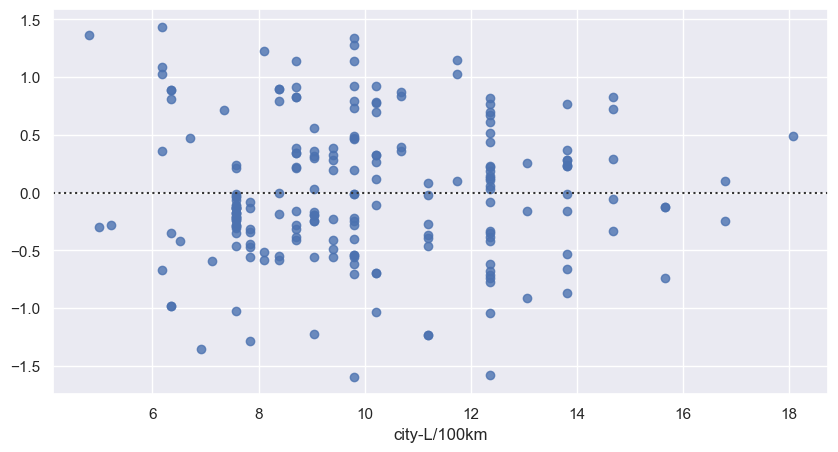

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
sns.residplot(x = data_df['city-L/100km'], y= pred);

As we can see most of the points are clustered around the zero line, so first condition is satisfied

In [ ]:
rd = pred - data_df['city-L/100km']
print(f"residuals above 0 are {rd[rd>0].shape[0]} and residuals below 0 are {rd[rd<0].shape[0]} ")

residuals above 0 are 92 and residuals below 0 are 109 


As we can see the plot is almost symmetric as well. So we can say that our regression model fits well.

## 5. Use R2 and MSE to determine the accuracy of the LR fit 

In [ ]:
#R2 score:
print('R2 score is:', lr2.score(Input,data_df['city-L/100km']))
#accuracy of fit:
acc = lr2.score(Input,data_df['city-L/100km'])*100
print(f'accuracy of fit is: {acc}%')

#MSE score:
print('Mean square error is:', mean_squared_error(pred,data_df['city-L/100km']))

R2 score is: 0.9395209620864109
accuracy of fit is: 93.9520962086411%
Mean square error is: 0.3865960568306008


# Question 3 (20 points)

### In this assignment, you will experiment with a toy dataset – the Iris dataset.

## 1. Load the Iris dataset.

In [ ]:
#loading the dataset
dataset = load_iris()

#create the dataframe
iris_df = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
iris_df['target'] = dataset.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 2. The Iris data has 3 classes. For the purpose of this assignment, you will modify it such that it has two classes – specifically, you will merge the “setosa” and “versicolor” classes.

In [ ]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

So we have to merge the target 0 and 1 

In [ ]:
#replace 0 with 1
iris_df.target = iris_df.target.replace({0:1})

#count the number of values in each class now : 1 and 2
iris_df.target.value_counts()

1    100
2     50
Name: target, dtype: int64

## 3. Construct a training set and a testing set using 80-20 split using random sampling.

In [ ]:
Input = iris_df.loc[:,iris_df.columns!='target']
output = iris_df['target']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(Input,output,train_size= 0.8, random_state= 42)

Analysing the representation of the classes:

In [ ]:
print(iris_df.target.value_counts())
print()
print(Y_train.value_counts())
print()
print(Y_test.value_counts())

1    100
2     50
Name: target, dtype: int64

1    81
2    39
Name: target, dtype: int64

1    19
2    11
Name: target, dtype: int64


## 4. Use Logistic Regression as a black box classifier and assess the performance.

In [ ]:
logr = LogisticRegression()
logr.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
Y_pred = logr.predict(X_test)

#R2 score for model evaluation:
score = logr.score(X_test,Y_test)
print('R2 score is:', score)

#mean square error:
print('mean squared error is:',mean_squared_error(Y_pred,Y_test))


R2 score is: 1.0
mean squared error is: 0.0


## 5. Implement stratified sampling, again using the 80-20 split. Decide the stratification variable and explain your choice.

In [ ]:
s = StratifiedShuffleSplit(n_splits=1, train_size = 0.8, random_state = 42)

for train_index, test_index in s.split(Input,output):
    X_train,X_test = Input.iloc[train_index], Input.iloc[test_index]
    Y_train,Y_test = output.iloc[train_index], output.iloc[test_index]

## 6. Re-assess the performance. Comment on any changes from the random sampling case. If there is no significant change, comment on why or why not?

In [ ]:
logr = LogisticRegression()
logr.fit(X_train,Y_train)

Y_pred = logr.predict(X_test)

#R2 score for model evaluation:
score = logr.score(X_test,Y_test)
print('R2 score is:', score)

#mean square error:
print('mean squared error is:',mean_squared_error(Y_pred,Y_test))

R2 score is: 1.0
mean squared error is: 0.0


In [ ]:
print(iris_df.target.value_counts())
print()
print(Y_train.value_counts())
print()
print(Y_test.value_counts())

1    100
2     50
Name: target, dtype: int64

1    80
2    40
Name: target, dtype: int64

1    20
2    10
Name: target, dtype: int64


The ratio of the classes is same in all the cases - stratified sampling

There is no change from random sampling and stratified sampling in this case becasue, the original data itself represents the classes in equal proportion. The only case where startified sampling will be better is when the original data some classes are under represented, then we do startified sampling to make sure that our model train data contains sufficient representation from this class. (This is supported above as we have seen that even in random sampling the ratio of classes is almost same!)

---
questions and further work:

1. one hot encoding in a single column?
2. input data in question 2 did not have normal distribution- good/bad?, what effect? 
3. what does n_plits in stratified sampling do? (if I increase nsplits the accuracy is decreasing!)